In [1]:
from areaseq_zeta import *

## Area sequences and statistics

### Area sequences

Dyck paths are implemented in SageMath as *DyckWords*, using letter $1$ for north steps and letter $0$ for east steps. You can get the *area sequence* of a Dyck path and reversely construct a Dyck path from an area sequence.

In [2]:
DyckWords(4)

Dyck words with 4 opening parentheses and 4 closing parentheses

In [4]:
DyckWords(4).cardinality()

14

In [5]:
list(DyckWords(4))

[[1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0]]

In [8]:
dw = DyckWord([1,1,0,1,0,0,1,0]); dw

[1, 1, 0, 1, 0, 0, 1, 0]

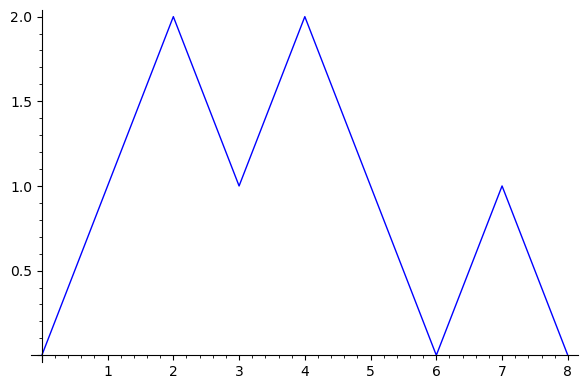

In [9]:
dw.plot()

In [10]:
dw.to_area_sequence()

[0, 1, 1, 0]

In [11]:
DyckWords().from_area_sequence([0,1,1,0])

[1, 1, 0, 1, 0, 0, 1, 0]

In [13]:
list(dw.to_area_sequence() for dw in DyckWords(3))

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 1, 2]]

In [12]:
list(dw.to_area_sequence() for dw in DyckWords(4))

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 0, 1, 2],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [0, 1, 1, 2],
 [0, 1, 2, 0],
 [0, 1, 2, 1],
 [0, 1, 2, 2],
 [0, 1, 2, 3]]

The following functions iterates directly through all possible area sequences without using Dyck paths.

In [2]:
list(area_sequences(4))

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 0, 1, 2],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [0, 1, 1, 2],
 [0, 1, 2, 0],
 [0, 1, 2, 1],
 [0, 1, 2, 2],
 [0, 1, 2, 3]]

The example of Fig. 2.

In [18]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq); dw

[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]

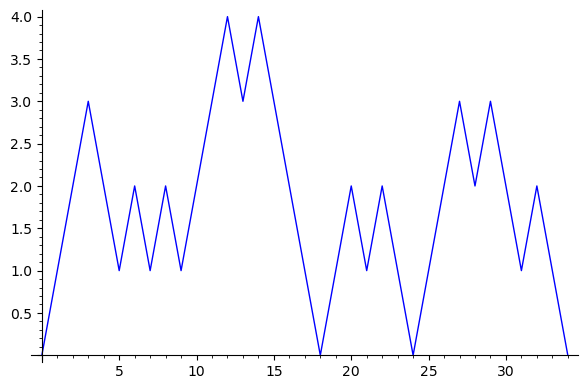

In [15]:
dw.plot()

In [16]:
dw.area()

22

In [17]:
sum(dw.to_area_sequence())

22

### The dinv

We implemented our own version of *dinv* directly on area sequences, it follows exactly Def. 2.

In [21]:
dinv??

In [19]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dinv(seq)

65

It is the same as the *dinv* statistic in SageMath.

In [22]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)
dw.dinv()

65

In [23]:
all(dinv(dw.to_area_sequence()) == dw.dinv() for dw in DyckWords(4))

True

In [24]:
all(dinv(dw.to_area_sequence()) == dw.dinv() for dw in DyckWords(5))

True

In [25]:
all(dinv(dw.to_area_sequence()) == dw.dinv() for dw in DyckWords(6))

True

### The bounce

The function ``bounce_seq`` gives the bounce sequence of a given area sequence as in Def. 3. The function ``bounce`` computes the bounce of the area sequence.

In [26]:
bounce_seq??

In [27]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
bounce_seq(seq)

[0, 1, 2, 0, 1, 0, 1, 2, 3, 0, 1, 0, 0, 1, 2, 0, 1]

In [28]:
bounce(seq)

47

It is **different** from the bounce statistic implemented in SageMath where the bounce path is computed starting by end of the path. The bounce in SageMath correspond to our bounce (and Haglund's bounce) of the reversed Dyck path.

In [29]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)
dw.reverse().bounce()

47

## The Map

### Area to dinv

The ``insert`` function performs the insertion in the area sequence as described in the paper.

In [3]:
insert??

In [2]:
seq = [0,1,0]

In [13]:
for i in range(len(seq) + 1):
    print(i,insert(seq,i))

0 [0, 0, 1, 0]
1 [0, 1, 1, 0]
2 [0, 1, 2, 0]
3 [0, 1, 0, 1]


The function ``last_position`` gives the list index of the last inserted entry: the leftmost maximal value in the rightmost block of maximal values. As it is the list index, it corresponds to $i_0 - 1$.

``admissible_insertion_positions`` is an iterator on the admissible posibles in admissible order.
We also provide ``M_positions`` and ``Mprime_positions``

In [2]:
seq = [0,1,2,2,2,1,0,1,2,2,0,1,1]

In [3]:
last_position(seq)

8

In [4]:
list(admissible_insertion_positions(seq))

[10, 9, 5, 4, 3, 13, 12, 8]

In [5]:
list(M_positions(seq))

[10, 9, 5, 4, 3]

In [6]:
list(Mprime_positions(seq))

[13, 12]

We can check Proposition 5 directly.

In [6]:
seq = [0,1,2,2,2,1,0,1,2,2,0,1,1]
all(dinv(insert(seq,ci)) == dinv(seq) + i for i,ci in enumerate(admissible_insertion_positions(seq)))

True

In [13]:
all(dinv(insert(seq,ci)) == dinv(seq) + i for seq in area_sequences(4) for i,ci in enumerate(admissible_insertion_positions(seq)))

True

In [14]:
all(dinv(insert(seq,ci)) == dinv(seq) + i for seq in area_sequences(5) for i,ci in enumerate(admissible_insertion_positions(seq)))

True

In [15]:
all(dinv(insert(seq,ci)) == dinv(seq) + i for seq in area_sequences(6) for i,ci in enumerate(admissible_insertion_positions(seq)))

True

Here is the example of Fig. 4

In [16]:
seq = [0,1,2,2,2,1,0,1,2,2,0,1,1]
print(seq,dinv(seq))
for i,ci in enumerate(admissible_insertion_positions(seq)):
    nseq = insert(seq,ci)
    print(i,ci,nseq,dinv(nseq))

[0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1] 44
0 10 [0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 3, 0, 1, 1] 44
1 9 [0, 1, 2, 2, 2, 1, 0, 1, 2, 3, 2, 0, 1, 1] 45
2 5 [0, 1, 2, 2, 2, 3, 1, 0, 1, 2, 2, 0, 1, 1] 46
3 4 [0, 1, 2, 2, 3, 2, 1, 0, 1, 2, 2, 0, 1, 1] 47
4 3 [0, 1, 2, 3, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1] 48
5 13 [0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2] 49
6 12 [0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1] 50
7 8 [0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1] 51


Using this, we easily implement the ``area_to_dinv`` function by simply growing the image sequence, using the ``grow_area_seq`` function which performs an insertion adding the right number of *dinv*. 

In [4]:
grow_area_seq??

In [6]:
# grow area seq on the previous example
grow_area_seq([0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1], 4)

[0, 1, 2, 3, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1]

In [7]:
area_to_dinv??

In [8]:
# The example of Fig 5
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
area_to_dinv(seq)

[0, 0, 1, 2, 2, 2, 0, 1, 2, 3, 4, 5, 6, 5, 5, 6, 3]

In [16]:
# the step by step as in Fig. 5
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
imageseq = []
for i in range(len(seq)):
    d = seq[i]
    imageseq = grow_area_seq(imageseq,d)
    print(seq[:i+1], " --> ", imageseq)
    print("area = ", sum(seq[:i+1]), " -- dinv = ", dinv(imageseq))

[0]  -->  [0]
area =  0  -- dinv =  0
[0, 1]  -->  [0, 0]
area =  1  -- dinv =  1
[0, 1, 2]  -->  [0, 0, 0]
area =  3  -- dinv =  3
[0, 1, 2, 1]  -->  [0, 0, 1, 0]
area =  4  -- dinv =  4
[0, 1, 2, 1, 1]  -->  [0, 0, 1, 0, 1]
area =  5  -- dinv =  5
[0, 1, 2, 1, 1, 1]  -->  [0, 0, 1, 2, 0, 1]
area =  6  -- dinv =  6
[0, 1, 2, 1, 1, 1, 2]  -->  [0, 0, 1, 2, 2, 0, 1]
area =  8  -- dinv =  8
[0, 1, 2, 1, 1, 1, 2, 3]  -->  [0, 0, 1, 2, 2, 2, 0, 1]
area =  11  -- dinv =  11
[0, 1, 2, 1, 1, 1, 2, 3, 3]  -->  [0, 0, 1, 2, 2, 2, 0, 1, 2]
area =  14  -- dinv =  14
[0, 1, 2, 1, 1, 1, 2, 3, 3, 0]  -->  [0, 0, 1, 2, 2, 2, 0, 1, 2, 3]
area =  14  -- dinv =  14
[0, 1, 2, 1, 1, 1, 2, 3, 3, 0, 1]  -->  [0, 0, 1, 2, 2, 2, 0, 1, 2, 3, 3]
area =  15  -- dinv =  15
[0, 1, 2, 1, 1, 1, 2, 3, 3, 0, 1, 1]  -->  [0, 0, 1, 2, 2, 2, 0, 1, 2, 3, 4, 3]
area =  16  -- dinv =  16
[0, 1, 2, 1, 1, 1, 2, 3, 3, 0, 1, 1, 0]  -->  [0, 0, 1, 2, 2, 2, 0, 1, 2, 3, 4, 5, 3]
area =  16  -- dinv =  16
[0, 1, 2, 1, 1, 1, 2, 3, 3

We can check that the map sends *area* to *dinv*

In [17]:
all(sum(seq) == dinv(area_to_dinv(seq)) for seq in area_sequences(4))

True

In [18]:
all(sum(seq) == dinv(area_to_dinv(seq)) for seq in area_sequences(5))

True

In [19]:
all(sum(seq) == dinv(area_to_dinv(seq)) for seq in area_sequences(6))

True

The inverse map uses the function ``ungrow_area_seq`` 

In [2]:
ungrow_area_seq??

In [3]:
dinv_to_area??

In [2]:
dinv_to_area([0, 0, 1, 2, 2, 2, 0, 1, 2, 3, 4, 5, 6, 5, 5, 6, 3])

[0, 1, 2, 1, 1, 1, 2, 3, 3, 0, 1, 1, 0, 1, 2, 2, 1]

We can check that it is indeed the inverse map

In [3]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dinv_to_area(area_to_dinv(seq)) == seq

True

In [4]:
all(dinv_to_area(area_to_dinv(seq)) == seq for seq in area_sequences(4))

True

In [5]:
all(dinv_to_area(area_to_dinv(seq)) == seq for seq in area_sequences(5))

True

In [6]:
all(dinv_to_area(area_to_dinv(seq)) == seq for seq in area_sequences(6))

True

### Bounce to area

We can check proposition 7

In [32]:
# checking the bullet points of Prop 7
def check_prop7_1(seq):
    if len(seq) == 0:
        return True
    u = seq[:-1]
    imageu = area_to_dinv(u)
    imageseq = grow_area_seq(imageu, seq[-1])
    bseq = bounce_seq(seq)
    bniszero = (bseq[-1] == 0)
    maxw = max(imageseq)
    maxincrease = (maxw == max(imageu) + 1)
    B = [i for i in range(1,len(bseq)) if bseq[i] == 0]
    M = list(M_positions(imageseq))
    Mprime = list(Mprime_positions(imageseq))
    return bniszero == maxincrease and len(B) == maxw and len(M) == bseq[-1] + 1 and len(Mprime) == seq[-1] - bseq[-1]
    
    

In [20]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
check_prop7_1(seq)

True

In [21]:
all(check_prop7_1(seq) for seq in area_sequences(4))

True

In [22]:
all(check_prop7_1(seq) for seq in area_sequences(5))

True

In [23]:
all(check_prop7_1(seq) for seq in area_sequences(6))

True

In [33]:
# checking the final statement of Prop 7
def check_prop7_2(seq):
    imageseq = area_to_dinv(seq)
    bseq = bounce_seq(seq)
    B = [i for i in range(1,len(bseq)) if bseq[i] == 0]
    n = len(seq)
    return all(sum(1 for v in imageseq if v >= k) == n - B[k-1] for k in range(1,max(imageseq)+1))
    

In [31]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
check_prop7_2(seq)

True

In [34]:
all(check_prop7_2(seq) for seq in area_sequences(4))

True

In [35]:
all(check_prop7_2(seq) for seq in area_sequences(5))

True

In [36]:
all(check_prop7_2(seq) for seq in area_sequences(6))

True

Finally, we can check than indeed the *bounce* is sent to the *area*

In [37]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
bounce(seq) == sum(area_to_dinv(seq))

True

In [38]:
all(bounce(seq) == sum(area_to_dinv(seq)) for seq in area_sequences(4))

True

In [39]:
all(bounce(seq) == sum(area_to_dinv(seq)) for seq in area_sequences(5))

True

In [40]:
all(bounce(seq) == sum(area_to_dinv(seq)) for seq in area_sequences(6))

True

### The $\zeta$ map

We provide ``dw_area_to_dinv`` and ``dw_dinv_to_area`` to apply the map directly on SageMath Dyck words.

In [2]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)

In [7]:
dw

[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]

In [4]:
dw_area_to_dinv(dw)

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [5]:
dw_dinv_to_area(dw)

[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]

We can check that the map sends *area* to *dinv*

In [8]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)
dw.area() == dw_area_to_dinv(dw).dinv()

True

In [9]:
all(dw.area() == dw_area_to_dinv(dw).dinv() for dw in DyckWords(4))

True

In [10]:
all(dw.area() == dw_area_to_dinv(dw).dinv() for dw in DyckWords(5))

True

In [11]:
all(dw.area() == dw_area_to_dinv(dw).dinv() for dw in DyckWords(6))

True

For the bounce, we need to reverse the Dyck path to fit the Sage definition

In [14]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)
dw.reverse().bounce() == dw_area_to_dinv(dw).area()

True

In [15]:
all(dw.reverse().bounce() == dw_area_to_dinv(dw).area() for dw in DyckWords(4))

True

In [16]:
all(dw.reverse().bounce() == dw_area_to_dinv(dw).area() for dw in DyckWords(5))

True

In [17]:
all(dw.reverse().bounce() == dw_area_to_dinv(dw).area() for dw in DyckWords(6))

True

And finally, we can check that the map corresponds to the Sage map if we first reverse the Dyck path (as explained in the Sage documentation)

In [20]:
seq = [0,1,2,1,1,1,2,3,3,0,1,1,0,1,2,2,1]
dw = DyckWords().from_area_sequence(seq)
dw.reverse().bounce_area_to_area_dinv_map() == dw_area_to_dinv(dw)

True

In [21]:
all(dw.reverse().bounce_area_to_area_dinv_map() == dw_area_to_dinv(dw) for dw in DyckWords(4))

True

In [22]:
all(dw.reverse().bounce_area_to_area_dinv_map() == dw_area_to_dinv(dw) for dw in DyckWords(5))

True

In [23]:
all(dw.reverse().bounce_area_to_area_dinv_map() == dw_area_to_dinv(dw) for dw in DyckWords(6))

True